<a href="https://colab.research.google.com/github/yejin0455/sesac-python/blob/main/%ED%86%B5%EA%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%ED%99%95%EB%A5%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import enum, random
class Coin(enum.Enum):
    FRONT = 0
    BACK = 1
    def random_coin():
        return random.choice([Coin.FRONT, Coin.BACK])

In [2]:
for _ in range(20):
    if Coin.random_coin() == Coin.FRONT:
        print(".", end=' ')
    else:
        print("1", end=' ')

. 1 1 1 1 . 1 1 1 1 1 1 1 1 1 . 1 . 1 1 

만약에 동전을 두 번 던졌을 때 P(both|first)와 P(both|either)를 구하시오

P(both|first) 첫 번째 던졌을 때 뒷면이 나오고 둘 다 뒷면이 나올 확률

P(both|either)둘 중 하나가 뒷면이 나오고 둘 다 뒷면이 나올 확률

In [3]:
both_back = 0  #둘 다 뒷면이 나온 횟수
first_back = 0  #첫 번째 뒷면이 나온 횟수
either_back = 0  #둘 중 하나는 뒷면이 나온 횟수

for _ in range(10000):
    first = Coin.random_coin()
    second = Coin.random_coin()
    if first == Coin.BACK:
        first_back += 1
    if first == Coin.BACK and second == Coin.BACK:
        both_back += 1
    if first == Coin.BACK or second == Coin.BACK:
        either_back += 1
print("P(both|first)", both_back/first_back)
print("P(both|either)", both_back/either_back)

P(both|first) 0.49072206534893104
P(both|either) 0.3249198717948718


균등분포와 누적분포

In [4]:
def uniform_pdf(x):  #균등분포
    if 0 <= x < 1:
        return 1
    return 0

In [5]:
def uniform_cdf(x):  #누적분포
    if x < 0:
        return 0
    if x < 1:
        return x
    return 1

In [6]:
xs = []
pys = []
cys = []
# -1~2까지 step=0.01로 균등 분포와 누적 분포를 계산하여 컬렉션에 보관
for x_100 in range(-100, 200):
    pys.append(uniform_pdf(x_100/100))
    cys.append(uniform_cdf(x_100/100))
    xs.append(x_100/100)

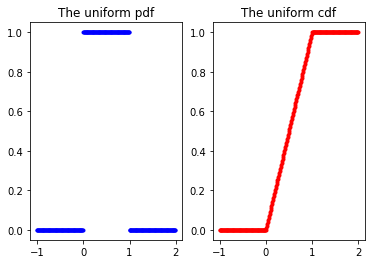

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2)
ax[0].plot(xs, pys, "b.", label="pdf")
ax[1].plot(xs, cys, "r.", label="cdf")
ax[0].set_title("The uniform pdf")
ax[1].set_title("The uniform cdf")
plt.show()

정규분포

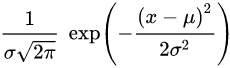

In [8]:
import math
SQRT_TWO_PI = math.sqrt(2*math.pi)
def normal_pdf(x, mu=0, sigma=1):  #정규분포 (mu:평균, sigma:표준편차)
    pre = 1/(sigma*SQRT_TWO_PI)
    post = math.exp(-((x-mu)**2)/(2*(sigma**2)))
    return pre * post

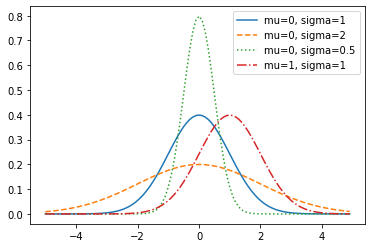

In [9]:
xs = [x/10.0 for x in range(-50, 50)]
ys1 = [normal_pdf(x, sigma=1) for x in xs]
ys2 = [normal_pdf(x, sigma=2) for x in xs]
ys3 = [normal_pdf(x, sigma=0.5) for x in xs]
ys4 = [normal_pdf(x, mu=1) for x in xs]
plt.plot(xs, ys1, '-', label="mu=0, sigma=1")
plt.plot(xs, ys2, '--', label="mu=0, sigma=2")
plt.plot(xs, ys3, ':', label="mu=0, sigma=0.5")
plt.plot(xs, ys4, '-.', label="mu=1, sigma=1")
plt.legend()
plt.show()

정규누적분포

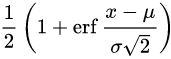

In [10]:
def normal_cdf(x, mu=0, sigma=1):  #정규누적분포
    return (1 + math.erf((x-mu)/(sigma*math.sqrt(2)))) / 2

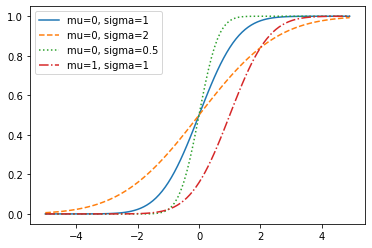

In [11]:
xs = [x/10.0 for x in range(-50, 50)]
ys1 = [normal_cdf(x, sigma=1) for x in xs]
ys2 = [normal_cdf(x, sigma=2) for x in xs]
ys3 = [normal_cdf(x, sigma=0.5) for x in xs]
ys4 = [normal_cdf(x, mu=1) for x in xs]
plt.plot(xs, ys1, '-', label="mu=0, sigma=1")
plt.plot(xs, ys2, '--', label="mu=0, sigma=2")
plt.plot(xs, ys3, ':', label="mu=0, sigma=0.5")
plt.plot(xs, ys4, '-.', label="mu=1, sigma=1")
plt.legend()
plt.show()

베르누이 시행

In [12]:
def bernouli_trial(p):
    return 1 if random.random() < p else 0

In [13]:
cnt = 0
for _ in range(1000):
    re = bernouli_trial(1/6)
    print(re, end=',')  #확률이 1/6인 사건이 발생하면 1, 발생하지 않으면 0 출력
    if re == 1:
        cnt += 1
print()
print(cnt)

0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,

In [14]:
def binomial(n, p):
    return sum(bernouli_trial(p) for _ in range(n))

In [15]:
for _ in range(20):
    print(binomial(100, 1/6), end='.')  #주사위를 100번 던졌을 때 숫자 1이 나올 횟수

20.19.18.12.18.10.18.14.12.15.24.18.6.22.12.18.24.12.18.17.

In [16]:
from collections import Counter

In [17]:
from numpy import histogram
def binomial_histogram(p, n, nps):  # p:확률, n:시도할 횟수, nps:(p,n)을 시도할 횟수
    data = [binomial(n, p) for _ in range(nps)]
    #print(data)
    #print(len(data))
    histogram = Counter(data)
    #print(histogram.values())
    #print(histogram.keys())
    #print([v/nps for v in histogram.values()])
    mu = p * n
    sigma = math.sqrt(n*p*(1-p))
    xs = range(min(data), max(data)+1)
    ys = [normal_cdf(i+0.5, mu, sigma) - normal_cdf(i-0.5, mu, sigma) for i in xs]  #normal_cdf에서 (i-0.5)~(i+0.5)의 변화량
    plt.bar(histogram.keys(), [v/nps for v in histogram.values()], color="r")
    plt.plot(xs, ys)
    plt.title()
    plt.show()

In [ ]:
binomial_histogram(1/6, 100, 1200)

로지스틱 회귀

In [21]:
import numpy as np
def sigmoid(x):  #시그모이드 함수, 로지스틱 함수와 같은 함수
    return 1/(1+np.e**(-x))

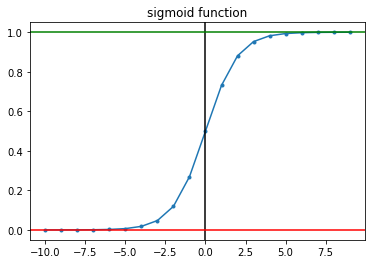

In [22]:
xs = range(-10, 10)
ys = [sigmoid(x) for x in xs]
plt.plot(xs, ys, marker='.')
plt.axvline(x=0, color='black')
plt.axhline(y=0, color='red')
plt.axhline(y=1, color='green')
plt.title("sigmoid function")
plt.show()

In [23]:
def gradient(y,x,w,b):
  wd = x*(sigmoid(w*x+b)-y)
  bd = (sigmoid(w*x+b)-y)
  return wd,bd

In [24]:
def gradient_descent(xs,ys,lr=0.001,epochs=100):
  if isinstance(xs,list):
    xs = np.array(xs).reshape(-1)
  wbhl = [] #학습 과정에서의 가중치와 편향을 보관하기 위함

  wp = np.random.uniform(-1,1) #초기 가중치를 랜덤하게 결정
  bp = np.random.uniform(-1,1) #초기 편향

  for epoch in range(epochs):
    for i,x in enumerate(xs):
      wd,bd = gradient(ys[i],x,wp,bp)
      wp = wp - (wd*lr) #가중치를 경사*lr 만큼 빼준다(곡선 아래 부분으로 이동)
      bp = bp - (bd*lr) #편향을 경사*lr 만큼 빼준다 이하동일
    wbhl.append([wp,bp])
  return wp,bp,wbhl

In [ ]:
xs = np.arange(-10,10,0.3)
ys = np.array([1 if x>0 else 0 for x in xs]) #else를 사용하는 경우 조건을 맨 뒤가 아닌 for문 앞에 적어준다
#참(0보다 크면 다 1), 거짓(아니면 다 0) 두가지 값만 존재

wp,bp,wbhl = gradient_descent(xs,ys,epochs=1000)
min_val = min(min(xs),min(ys))
max_val = max(max(xs),max(ys))

for wi in range(0,len(wbhl)):
  if wi > 5 and wi%50!=0: #초반 5개 외, 50번 마다 그래프 출력
    continue
  w,b = wbhl[wi]
  pre_ys = [sigmoid(w*x+b) for x in xs]
  plt.figure(figsize=(5,5))
  plt.plot(xs,ys,'b^',label='actual') #실제값을 도면에 뿌림
  plt.plot(xs,pre_ys,'r.',label=f'epoch:{wi} predict w:{w} b:{b}')
  plt.axvline(x=0,color='black')
  plt.axhline(y=0,color='black')
  plt.xlim(min_val,max_val)
  plt.ylim(min_val,max_val)
  plt.legend()
  plt.show()

In [ ]:
xs2 = [[x] for x in xs]
xs2

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
train_xs, test_xs, train_ys, test_ys = train_test_split(xs2, ys)

In [29]:
len(xs2), len(ys), len(train_xs), len(test_xs), len(train_ys), len(test_ys)

(67, 67, 50, 17, 50, 17)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr_model = LogisticRegression() #학습 모델 개체 생성
lr_model.fit(train_xs,train_ys) #학습시키기
pre_vals = lr_model.predict(test_xs) #예측(독립변수 대입)
for i,y in enumerate(test_ys):
  print(f"actual:{y}, predict:{pre_vals[i]}")

actual:1, predict:1
actual:0, predict:0
actual:1, predict:1
actual:0, predict:0
actual:0, predict:0
actual:0, predict:0
actual:0, predict:0
actual:0, predict:0
actual:1, predict:1
actual:0, predict:0
actual:0, predict:0
actual:1, predict:1
actual:1, predict:1
actual:1, predict:0
actual:1, predict:1
actual:0, predict:0
actual:1, predict:1


In [32]:
print(lr_model.score(train_xs, train_ys))
print(lr_model.score(test_xs, test_ys))

1.0
0.9411764705882353


x > 5 일 때 99.7% 확률로 1 

2 < x <= 5 일 때 90% 확률로 1

0 < x <= 2일 때 70% 확률로 1

x <= 0 일 때 0% 확률로 1

In [36]:
xs = np.arange(-10, 10, 0.3)
ys1 = []
for x in xs:
    if x > 5:
        if np.random.uniform(0, 10) > 0.03:  #0~10사이의 랜덤한 수가 0.03보다 크면
            ys1.append(1)
        else:
            ys1.append(0)
    elif x > 2:
        if np.random.uniform(0, 10) > 1:
            ys1.append(1)
        else:
            ys1.append(0)
    elif x > 0:
        if np.random.uniform(0, 10) > 3:
            ys1.append(1)
        else:
            ys1.append(0)
    else:
        ys1.append(0)

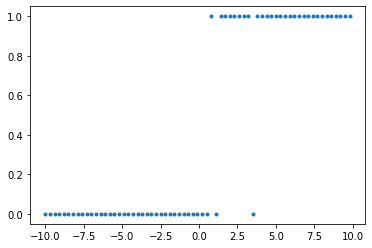

In [37]:
plt.plot(xs, ys1, '.')
plt.show()

In [ ]:
wp,bp,wbhl = gradient_descent(xs,ys1,epochs=1000)

min_val = min(min(xs),min(ys1))
max_val = max(max(xs),max(ys1))

for wi in range(len(wbhl)):
  if wi > 5 and wi%50!=0: #초반 5개 외, 50번 마다 그래프 출력
    continue
  w,b = wbhl[wi]
  pre_ys = [sigmoid(w*x+b) for x in xs]
  plt.figure(figsize=(5,5))
  plt.plot(xs,ys1,'b^',label='actual') #실제값을 도면에 뿌림
  plt.plot(xs,pre_ys,'r.',label=f'epoch:{wi} predict w:{w} b:{b}')
  plt.axvline(x=0,color='black')
  plt.axhline(y=0,color='black')
  plt.xlim(min_val,max_val)
  plt.ylim(min_val,max_val)
  plt.legend()
  plt.show()